In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from statistics import median
from matplotlib import style
from matplotlib.pyplot import plot
from numpy import mean
from datetime import time

In [77]:
df=pd.read_csv('usacc.csv')

In [16]:
df.head(6)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513740 entries, 0 to 3513739
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [19]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [20]:
df['Severity'].value_counts()

2    2373299
3     998913
4     112353
1      29175
Name: Severity, dtype: int64

In [21]:
df['State'].value_counts()

CA    816826
TX    329284
FL    258002
SC    173277
NC    165963
NY    160817
PA    106794
IL     99692
VA     96075
MI     95983
GA     93614
OR     90134
MN     81865
AZ     78586
TN     69895
WA     68545
OH     66140
LA     61515
OK     60003
NJ     59059
MD     53593
UT     51685
CO     49731
AL     44625
MA     39044
IN     33752
MO     33643
CT     25901
NE     23971
KY     22553
WI     20120
RI     11753
IA     11475
NV     10724
NH      7984
KS      7939
MS      6585
DE      5739
NM      5523
DC      4820
WV      2381
ME      2243
ID      2048
AR      2012
VT       702
MT       512
WY       508
SD        61
ND        44
Name: State, dtype: int64

In [22]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513740e+06,3.513740e+06,3.513740e+06,1.034922e+06,1.034922e+06,3.513740e+06,1.250786e+06,3.448004e+06,1.645484e+06,3.444049e+06,3.457856e+06,3.437879e+06,3.059127e+06,1.487859e+06
mean,2.080226e+02,2.339935e+00,3.654208e+01,-9.579208e+01,3.755791e+01,-1.004574e+02,2.816462e-01,5.975823e+03,6.193496e+01,5.355749e+01,6.511372e+01,2.974452e+01,9.122668e+00,8.218940e+00,1.598132e-02
std,2.076627e+01,5.522103e-01,4.883511e+00,1.736894e+01,4.861103e+00,1.852878e+01,1.550166e+00,1.496662e+04,1.862108e+01,2.377308e+01,2.275582e+01,8.322425e-01,2.885840e+00,5.262870e+00,1.928187e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363793e+01,-1.174420e+02,3.399487e+01,-1.183450e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591703e+01,-9.102632e+01,3.779787e+01,-9.703673e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032258e+01,-8.093303e+01,4.105139e+01,-8.210268e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [27]:
median(df['Temperature(F)'])

84.9

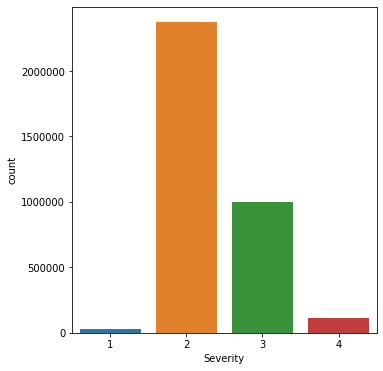

In [60]:
fig = plt.figure(figsize = (12,6))
fig.add_subplot(1, 2, 1)
sns.countplot(df['Severity'])

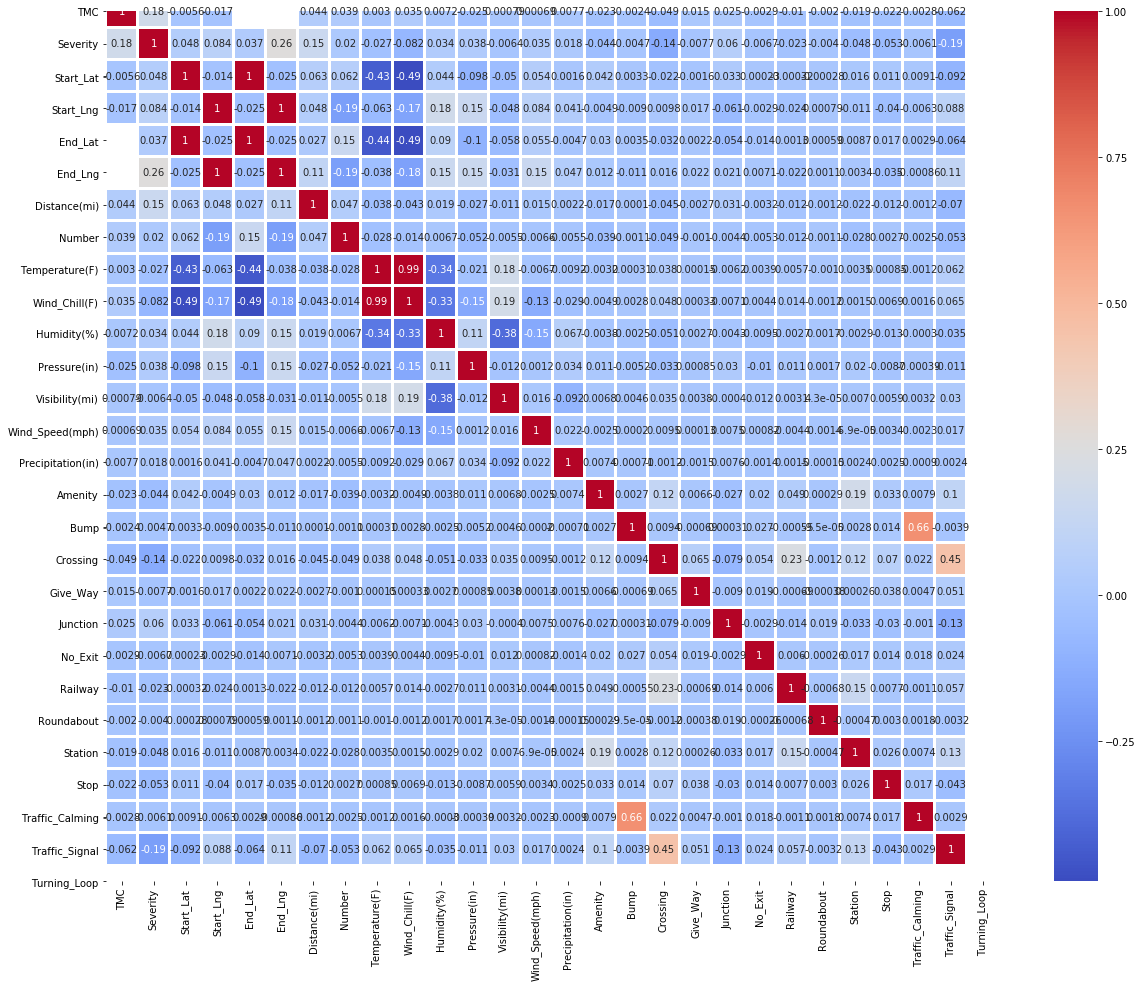

In [59]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True, linewidth=2, cmap='coolwarm')

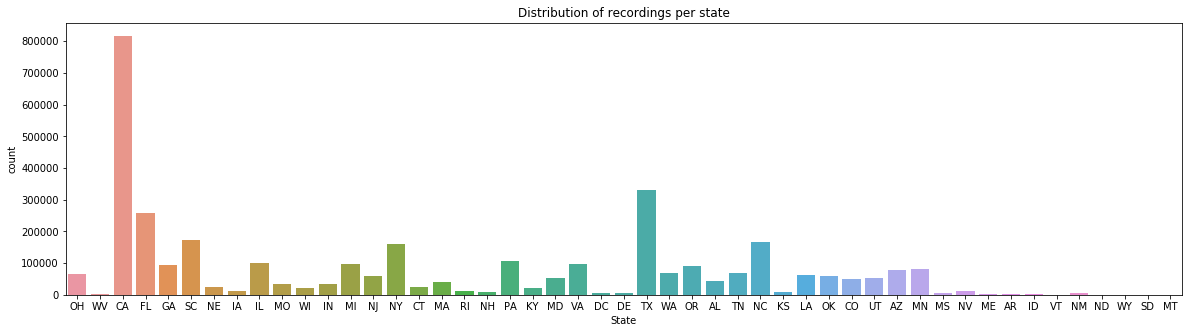

In [31]:
plt.figure(figsize=(20, 5))
plt.title('Distribution of recordings per state')
sns.countplot(x=df['State'], data=df)

In [33]:
df.shape

(3513740, 49)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text yticklabel objects>)

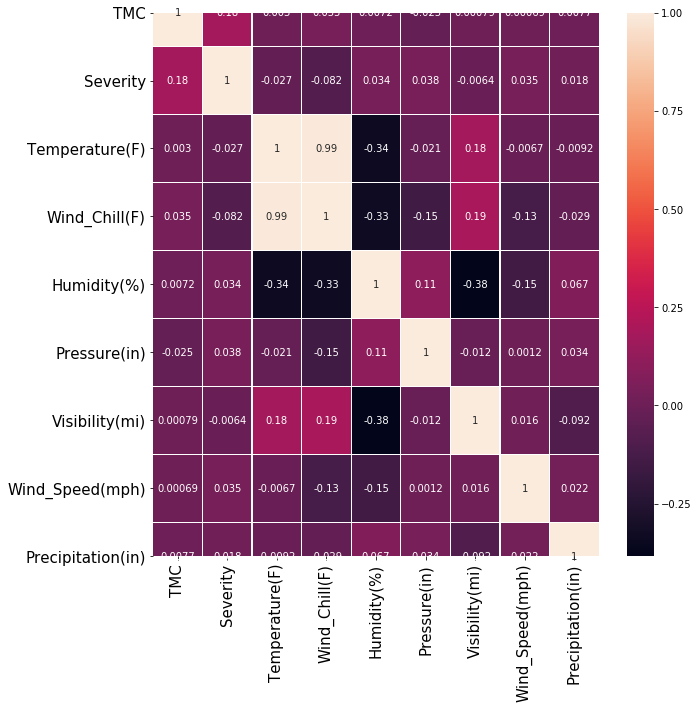

In [18]:
fig = sns.heatmap(df[['TMC','Severity','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']].corr(), annot=True, linewidths=0.2, color='red')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

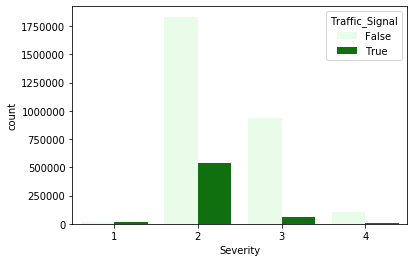

In [19]:
sns.countplot(df['Severity'], hue=df['Traffic_Signal'], color='green')

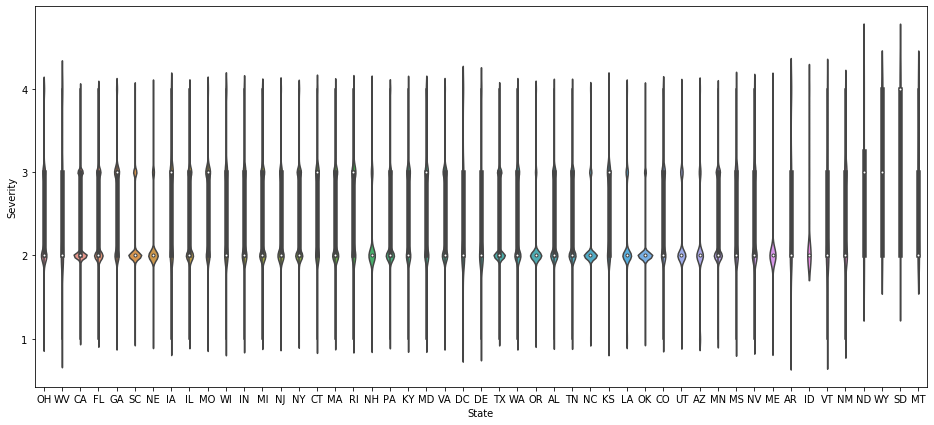

In [58]:
fig, ax = plt.subplots(figsize =(16, 7)) 
sns.violinplot(ax = ax, x = df["State"],  y = df["Severity"]) 

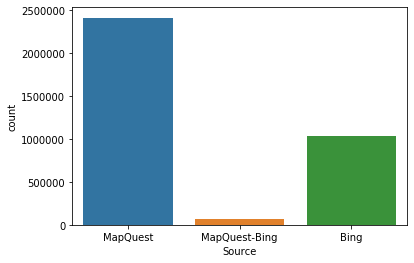

In [61]:
sns.countplot(df['Source'])

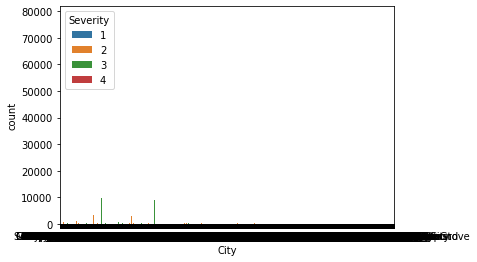

In [75]:
sns.countplot(df['City'], hue=df['Severity'])

In [22]:
df.isnull().sum()


ID                             0
Source                         0
TMC                      1034922
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262954
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43325
Temperature(F)             65736
Wind_Chill(F)            1868256
Humidity(%)                69691
Pressure(in)               55884
Visibility(mi)             75861
Wind_Direction             58877
Wind_Speed(mph)           454613
Precipitat

In [40]:
#to check the crash severity at sunrise vs sunset
plt.figure(figsize=(12,8))
data = df.groupby(['Sunrise_Sunset'])
df.Severity.mean().plt(kind='bar')
plt.ylabel("Severity", fontsize=(15))
plt.xlabel("Sunrise vs Sunset", fontsize=(15))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

AttributeError: 'float' object has no attribute 'plt'

<Figure size 864x576 with 0 Axes>

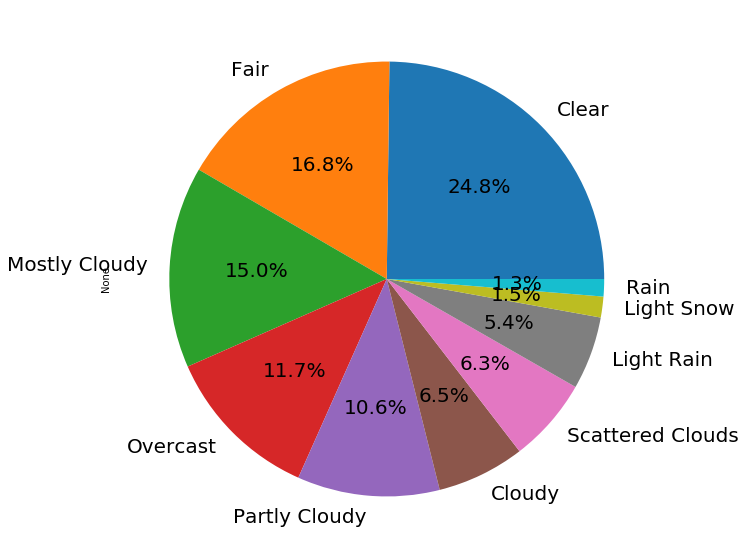

In [36]:
plt.figure(figsize=(10,10))
data = df
data.groupby(['Weather_Condition']).size().nlargest(10).plot.pie(autopct='%1.1f%%', fontsize=(20))

Text(0, 0.5, 'Visibility(mi)')

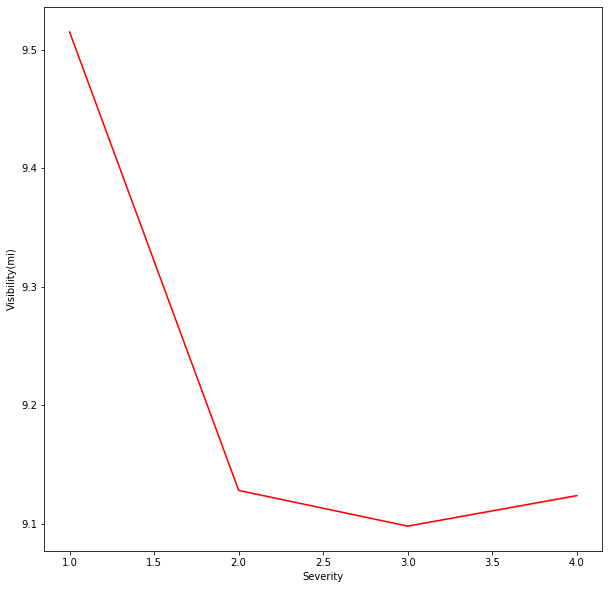

In [42]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Severity", y="Visibility(mi)", ci=False, estimator=mean, data=df, color= 'red')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Severity", fontsize=10)
plt.ylabel("Visibility(mi)", fontsize=10)

In [66]:
plt.figure(figsize=(12,8))
df = df.groupby(['Sunrise_Sunset'])
df.Severity.mean().plot(kind='bar')
plt.ylabel("Severity", fontsize=(15))
plt.xlabel("Sunrise vs Sunset", fontsize=(15))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

<Figure size 864x576 with 0 Axes>

In [78]:
plt.figure(figsize=(12,8))
data= df.groupby(['Sunrise_Sunset'])
df.Severity.mean().plot(kind='bar')
plt.ylabel("Severity", fontsize=(15))
plt.xlabel("Sunrise vs Sunset", fontsize=(15))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

AttributeError: 'float' object has no attribute 'plot'

<Figure size 864x576 with 0 Axes>

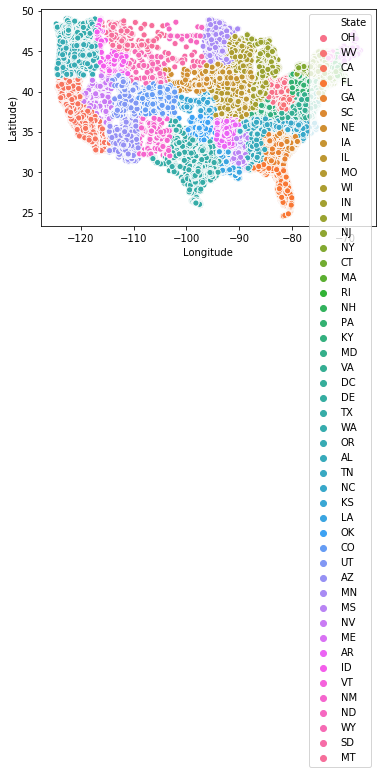

In [79]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='State')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

Text(0.5, 51.00000000000006, 'Factor (Year)')

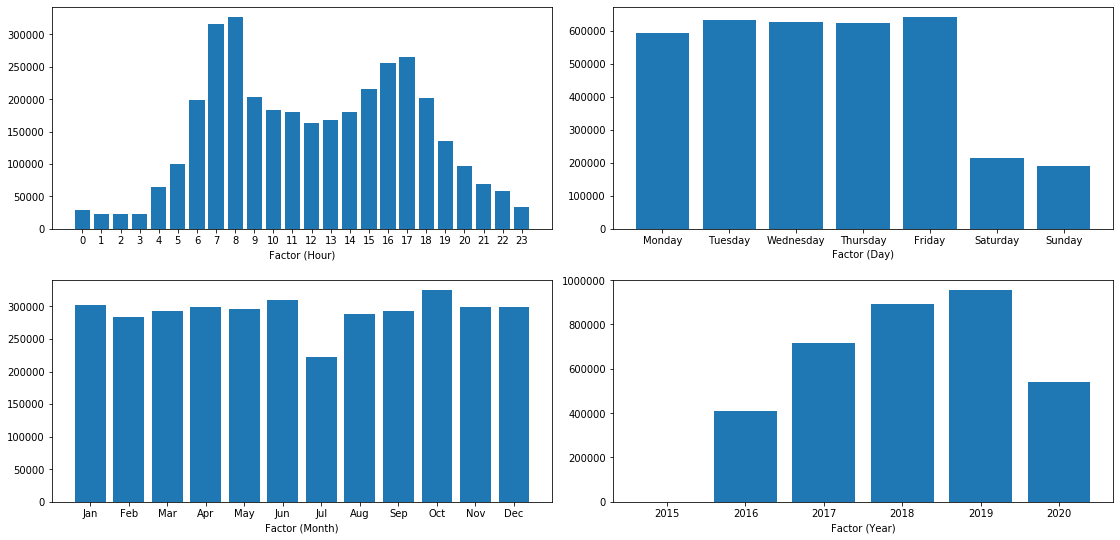

In [86]:
import calendar
month_names = dict(enumerate(calendar.month_abbr))
day_names = dict(enumerate(calendar.day_name))
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.dayofweek
df['DayName'] = df['Start_Time'].dt.weekday_name
df['Month'] = df['Start_Time'].dt.month
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
fig.tight_layout(pad=3)

hours = df.groupby('Hour').size()
ax1.bar(hours.index, hours)
ax1.set_xticks(hours.index)
ax1.set_xlabel('Factor (Hour)')

days = df.groupby('Day').size()
ax2.bar(days.index, days)
ax2.set_xticks(days.index)
ax2.set_xticklabels([day_names[i] for i in days.index])
ax2.set_xlabel('Factor (Day)')
months = df.groupby('Month').size()
ax3.bar(months.index, months)
ax3.set_xticks(months.index)
ax3.set_xticklabels([month_names[i] for i in months.index])
ax3.set_xlabel('Factor (Month)')

years = df.groupby('Year').size()
ax4.bar(years.index, years)
ax4.set_xticks(years.index)
ax4.set_xlabel('Factor (Year)')
